
image 1/1 D:\SBI Life Hack-AI-Thon\Handwritten Extraction\Test images\2.jpg: 96x640 6 0s, 29.6ms
Speed: 6.0ms preprocess, 29.6ms inference, 17.2ms postprocess per image at shape (1, 3, 96, 640)


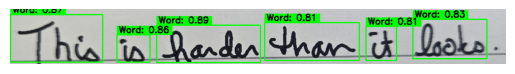

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Define class names for better visualization
CLASS_NAMES = ["Word"]  # Modify this according to your dataset classes

# Load your trained YOLO model
model = YOLO("./word_Detection.pt")  

# Run inference on an image
results = model("./Test images/2.jpg")  # Replace with your actual image path

# Get the original image
output_image = results[0].orig_img.copy()

# Process results
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0].item())  # Class ID
        conf = box.conf[0].item()  # Confidence score
        xyxy = box.xyxy[0].tolist()  # Bounding box coordinates [x_min, y_min, x_max, y_max]

        x_min, y_min, x_max, y_max = map(int, xyxy)
        class_name = CLASS_NAMES[cls] if cls < len(CLASS_NAMES) else f"Class {cls}"
        
        # Draw rectangle
        cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Create label text
        label = f"{class_name}: {conf:.2f}"

        # Get text size for background
        (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
        
        # Draw filled rectangle behind text for better visibility
        cv2.rectangle(output_image, (x_min, y_min - text_height - 5), (x_min + text_width + 10, y_min), (0, 255, 0), -1)
        
        # Put text on top of the filled rectangle
        cv2.putText(output_image, label, (x_min + 5, y_min - 5), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()